In [3]:
#!/usr/bin/env python3
import os
import pathlib
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

In [3]:
path = pathlib.Path("D:\\Users\\kbandi\\Desktop\\DS\\Copart")
path.exists()
True
# importing required modules 
from zipfile import ZipFile 
# specifying the zip file name 
file_name = "D:\\Users\\kbandi\\Desktop\\DS\\Copart\\Large_Data_Sets.zip"
print(file_name)
os.path.isfile(file_name)

D:\Users\kbandi\Desktop\DS\Copart\Large_Data_Sets.zip


False

In [4]:
# opening the zip file in READ mode 
out_file_name = "D:\\Users\\kbandi\\Desktop\\DS\\Copart\\"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall(out_file_name) 
    print('Done!') 

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Users\\kbandi\\Desktop\\DS\\Copart\\Large_Data_Sets.zip'

In [ ]:
#remove the extracted .zip file 
os.remove(file_name)

In [ ]:
path_all_files = r'D:\Users\kbandi\Desktop\DS\Copart\Large Data Sets'     

In [ ]:
all_files = glob.glob(os.path.join(path_all_files, "*.csv"))     
print(all_files)

In [ ]:
#not in scope for this probelm , but shows how to do all merge 
df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True, sort=True)
# doesn't create a list, nor does it append to one all folder merge


In [4]:
#read all 4 files independently
auction_data=pd.read_csv('D:\\Users\\kbandi\\Desktop\\DS\\Copart\\Large Data Sets\\auction_data.csv') 
bid_summary_data=pd.read_csv('D:\\Users\\kbandi\\Desktop\\DS\\Copart\\Large Data Sets\\bid_summary_data.csv') 
buyer_profiles=pd.read_csv('D:\\Users\\kbandi\\Desktop\\DS\\Copart\\Large Data Sets\\buyer_profiles.csv') 
invoice_data=pd.read_csv('D:\\Users\\kbandi\\Desktop\\DS\\Copart\\Large Data Sets\\invoice_data.csv') 


In [ ]:
os.listdir(path_all_files)

In [5]:
mrge_inv_buyer=pd.merge(invoice_data,buyer_profiles,on='BUYER')
mrge_inv_buyer.head()

,ID,HIGH_BID,INVOICE_DATE,BUYER_RELISTS,BUYER,BUYER_STATE,BUYER_COUNTRY
0,10231805,1420,2019-02-05,0,9254,SV,SLV
1,17322209,1420,2019-01-31,0,9254,SV,SLV
2,26148273,815,2019-01-28,0,9254,SV,SLV
3,47645751,1575,2019-01-29,0,9254,SV,SLV
4,93723023,1470,2019-01-16,0,9254,SV,SLV


In [6]:
mrge_inv_buyer_bid=pd.merge(mrge_inv_buyer,bid_summary_data,on='ID')
mrge_all=pd.merge(mrge_inv_buyer_bid,auction_data,on='ID')

In [7]:
mrge_all.describe()

,ID,HIGH_BID,BUYER_RELISTS,BUYER,num_bids,VEHICLE_YEAR
count,1.252650e+05,125265.000000,125265.000000,125265.000000,125265.000000,125265.000000
mean,5.505066e+07,4976.514030,0.028723,6636.025817,18.953299,2014.673732
std,2.562021e+07,5296.127181,0.186964,2487.891552,16.027441,1.928807
min,1.023180e+07,315.000000,0.000000,1309.000000,1.000000,2012.000000
25%,3.306637e+07,1840.000000,0.000000,4570.000000,7.000000,2013.000000
50%,5.500068e+07,3410.000000,0.000000,6543.000000,15.000000,2015.000000
75%,7.713380e+07,6300.000000,0.000000,8649.000000,26.000000,2016.000000
max,9.957383e+07,147000.000000,7.000000,11233.000000,224.000000,2019.000000


In [8]:

#merge all files into one final format
mrge_all.head()

,ID,HIGH_BID,INVOICE_DATE,BUYER_RELISTS,BUYER,BUYER_STATE,BUYER_COUNTRY,AUCTION_DATE_x,BID_GROUP,num_bids,AUCTION_DATE_y,VEHICLE_YEAR,VEHICLE_MAKE,GROUP_MODEL,VEHICLE_CATEGORY,MODEL_TRIM,YARD_CITY,YARD_STATE
0,10231805,1420,2019-02-05,0,9254,SV,SLV,2019-02-05,live,4,2019-02-05,2016,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
1,10231805,1420,2019-02-05,0,9254,SV,SLV,2019-02-05,automated,20,2019-02-05,2016,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
2,17322209,1420,2019-01-31,0,9254,SV,SLV,2019-01-30,automated,2,2019-01-30,2015,NISS,VERSA,A,VERSA NOTE,MIAMI,FL
3,26148273,815,2019-01-28,0,9254,SV,SLV,2019-01-28,automated,11,2019-01-28,2012,NISS,SENTRA,A,SENTRA 2.0,LEBANON,TN
4,26148273,815,2019-01-28,0,9254,SV,SLV,2019-01-28,live,2,2019-01-28,2012,NISS,SENTRA,A,SENTRA 2.0,LEBANON,TN


In [9]:
#display the list of collumn names
for column_names in mrge_all.columns: 
    #str.upper(column_names)
    #print(str.upper(column_names)) 
    print(column_names)

ID
HIGH_BID
INVOICE_DATE
BUYER_RELISTS
BUYER
BUYER_STATE
BUYER_COUNTRY
AUCTION_DATE_x
BID_GROUP
num_bids
AUCTION_DATE_y
VEHICLE_YEAR
VEHICLE_MAKE
GROUP_MODEL
VEHICLE_CATEGORY
MODEL_TRIM
YARD_CITY
YARD_STATE


In [10]:
#remove if any duplicate collumns are there in the join
#remove AUCTION_DATE_x from the list
mrge_all.drop(['AUCTION_DATE_x'],axis = 1,inplace = True)
mrge_all.head()


,ID,HIGH_BID,INVOICE_DATE,BUYER_RELISTS,BUYER,BUYER_STATE,BUYER_COUNTRY,BID_GROUP,num_bids,AUCTION_DATE_y,VEHICLE_YEAR,VEHICLE_MAKE,GROUP_MODEL,VEHICLE_CATEGORY,MODEL_TRIM,YARD_CITY,YARD_STATE
0,10231805,1420,2019-02-05,0,9254,SV,SLV,live,4,2019-02-05,2016,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
1,10231805,1420,2019-02-05,0,9254,SV,SLV,automated,20,2019-02-05,2016,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
2,17322209,1420,2019-01-31,0,9254,SV,SLV,automated,2,2019-01-30,2015,NISS,VERSA,A,VERSA NOTE,MIAMI,FL
3,26148273,815,2019-01-28,0,9254,SV,SLV,automated,11,2019-01-28,2012,NISS,SENTRA,A,SENTRA 2.0,LEBANON,TN
4,26148273,815,2019-01-28,0,9254,SV,SLV,live,2,2019-01-28,2012,NISS,SENTRA,A,SENTRA 2.0,LEBANON,TN


In [11]:
#rename AUCTION_DATE_y to #rename AUCTION_DATE
mrge_all.rename(columns = {'AUCTION_DATE_y':'AUCTION_DATE'}, inplace = True) 
mrge_all.head(10)

,ID,HIGH_BID,INVOICE_DATE,BUYER_RELISTS,BUYER,BUYER_STATE,BUYER_COUNTRY,BID_GROUP,num_bids,AUCTION_DATE,VEHICLE_YEAR,VEHICLE_MAKE,GROUP_MODEL,VEHICLE_CATEGORY,MODEL_TRIM,YARD_CITY,YARD_STATE
0,10231805,1420,2019-02-05,0,9254,SV,SLV,live,4,2019-02-05,2016,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
1,10231805,1420,2019-02-05,0,9254,SV,SLV,automated,20,2019-02-05,2016,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
2,17322209,1420,2019-01-31,0,9254,SV,SLV,automated,2,2019-01-30,2015,NISS,VERSA,A,VERSA NOTE,MIAMI,FL
3,26148273,815,2019-01-28,0,9254,SV,SLV,automated,11,2019-01-28,2012,NISS,SENTRA,A,SENTRA 2.0,LEBANON,TN
4,26148273,815,2019-01-28,0,9254,SV,SLV,live,2,2019-01-28,2012,NISS,SENTRA,A,SENTRA 2.0,LEBANON,TN
5,47645751,1575,2019-01-29,0,9254,SV,SLV,automated,3,2019-01-29,2015,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
6,47645751,1575,2019-01-29,0,9254,SV,SLV,live,2,2019-01-29,2015,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
7,93723023,1470,2019-01-16,0,9254,SV,SLV,automated,20,2019-01-15,2012,FORD,F150,P,F150 SUPER,ANCHORAGE,AK
8,93723023,1470,2019-01-16,0,9254,SV,SLV,live,28,2019-01-15,2012,FORD,F150,P,F150 SUPER,ANCHORAGE,AK
9,10257798,945,2019-01-15,0,3420,HN,HND,automated,9,2019-01-15,2014,FORD,FOCUS,A,FOCUS SE,ELLENWOOD,GA


<class 'pandas.core.series.Series'>
2012    20498
2013    21678
2014    19592
2015    19333
2016    17007
2017    15745
2018    10573
2019      839
Name: VEHICLE_YEAR, dtype: int64


Text(0.5,0,'Year')

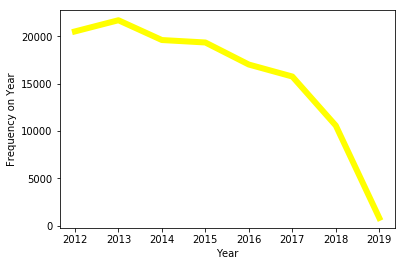

In [12]:
#Univariant analysis

#Count of ID for VEHICLE_YEAR

sf=mrge_all['VEHICLE_YEAR'].value_counts().sort_index()
print(type(sf))
print(sf)

plt.plot(sf,linewidth=6,color='yellow')
plt.ylabel('Frequency on Year')
plt.xlabel('Year')

<class 'pandas.core.series.Series'>
0    121975
1      3057
2       191
3        27
4         3
5         8
6         2
7         2
Name: BUYER_RELISTS, dtype: int64


Text(0.5,0,'Year')

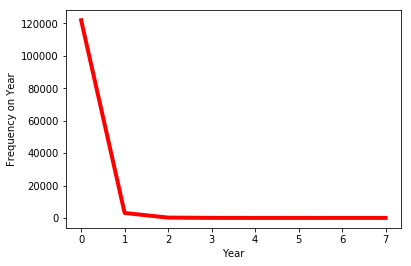

In [13]:
#Count of ID for BUYER_RELISTS


sf=mrge_all['BUYER_RELISTS'].value_counts().sort_index()
print(type(sf))
print(sf)

plt.plot(sf,linewidth=4,color='red')
plt.ylabel('Frequency on Year')
plt.xlabel('Year')

In [14]:
#convert pandas series type to Dataframe
df = pd.DataFrame([sf]).T
type(df)
 

pandas.core.frame.DataFrame

<class 'pandas.core.series.Series'>
1.0    3057
2.0     191
3.0      27
4.0       3
5.0       8
6.0       2
7.0       2
Name: BUYER_RELISTS, dtype: int64


Text(0.5,0,'Year')

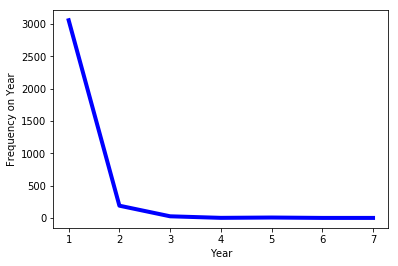

In [15]:
sf=mrge_all['BUYER_RELISTS'].where(mrge_all['BUYER_RELISTS']>0).value_counts().sort_index()
print(type(sf))
print(sf)

plt.plot(sf,linewidth=4,color='blue')
plt.ylabel('Frequency on Year')
plt.xlabel('Year')

In [16]:
sf=mrge_all['BID_GROUP'].value_counts().sort_index()
print(type(sf))
print(sf)
#we can conclude there are more automated Bid Groups

<class 'pandas.core.series.Series'>
automated    66730
live         58535
Name: BID_GROUP, dtype: int64


In [17]:
#Describe buyer preferences in vehicles based on their physical location.

veh_loc=mrge_all[['BUYER','VEHICLE_MAKE','BUYER_COUNTRY']]
veh_loc.head(7)

,BUYER,VEHICLE_MAKE,BUYER_COUNTRY
0,9254,NISS,SLV
1,9254,NISS,SLV
2,9254,NISS,SLV
3,9254,NISS,SLV
4,9254,NISS,SLV
5,9254,NISS,SLV
6,9254,NISS,SLV


In [18]:
#number of Car based on Location COuntry

veh_loc.sort_values(by='BUYER_COUNTRY').head(6)

#from the below Buyer country is empty, we need to remove such entries on veh_loc data frame



,BUYER,VEHICLE_MAKE,BUYER_COUNTRY
116074,9383,HOND,
117392,8572,TOYT,
117393,8572,TOYT,
117394,8572,NISS,
117395,8572,NISS,
117396,8572,FORD,


In [19]:
veh_loc.BUYER_COUNTRY.unique()

#how to handle NULL values need to be checked

# We have '   ' in the data

array(['SLV', 'HND', 'USA', 'GTM', 'MEX', 'BOL', 'GEO', 'NGA', 'CAN',
       'AFG', 'JOR', 'ARE', 'LBY', '   ', 'BHS', 'GHA', 'LBN', 'POL',
       'NIC', 'KHM', 'BLZ', 'ARM', 'CRI', 'CHL', 'YEM', 'DOM', 'IRQ',
       'LBR', 'ABW', 'EST', 'GIN', 'BEN', 'SVK', 'CIV', 'COL', 'UKR',
       'BLR', 'BGR', 'PAN', 'GBR', 'CUR', 'VGB', 'JAM', 'KOR', 'DEU',
       'MLI', 'NER', 'OMN', 'ALB', 'AZB', 'KAZ', 'AUS', 'EGY', 'RUS',
       'CMR', 'SUR', 'NLD', 'PER', 'ESP', 'MDA', 'GAB', 'PRY', 'TJK',
       'CHN'], dtype=object)

In [20]:
veh_loc.sort_values(by='BUYER_COUNTRY').head(6)

,BUYER,VEHICLE_MAKE,BUYER_COUNTRY
116074,9383,HOND,
117392,8572,TOYT,
117393,8572,TOYT,
117394,8572,NISS,
117395,8572,NISS,
117396,8572,FORD,


In [21]:
veh_loc.BUYER_COUNTRY=veh_loc.BUYER_COUNTRY.str.strip().replace("",np.NaN)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
veh_loc.describe()

,BUYER
count,125265.000000
mean,6636.025817
std,2487.891552
min,1309.000000
25%,4570.000000
50%,6543.000000
75%,8649.000000
max,11233.000000


In [23]:
veh_loc.isna().sum()

BUYER               0
VEHICLE_MAKE        0
BUYER_COUNTRY    1049
dtype: int64

In [24]:
veh_loc.dropna().isna().sum()

BUYER            0
VEHICLE_MAKE     0
BUYER_COUNTRY    0
dtype: int64

In [25]:
veh_loc.dropna(inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
veh_loc.describe()

,BUYER
count,124216.000000
mean,6624.456543
std,2486.869699
min,1309.000000
25%,4562.000000
50%,6529.000000
75%,8649.000000
max,11233.000000


In [27]:
veh_loc_final=veh_loc.groupby(['BUYER_COUNTRY','VEHICLE_MAKE']).count()

In [28]:
veh_loc_final.describe()

,BUYER
count,988.000000
mean,125.724696
std,778.069477
min,1.000000
25%,2.000000
50%,7.000000
75%,29.000000
max,10941.000000


In [29]:
veh_loc_final.head(20)

BUYER
BUYER_COUNTRY VEHICLE_MAKE       
ABW           FORD              1
              HOND              6
              INFI              2
              JEP               3
              NISS              2
              TOYT             11
AFG           ACUR              2
              AUDI              9
              BMW              25
              BUIC              8
              CADI              7
              CHEV             99
              CHRY             14
              DODG             32
              FIAT              2
              FORD            143
              GMC              17
              HOND             61
              HYUN            182
              INFI             22

In [30]:
%matplotlib inline

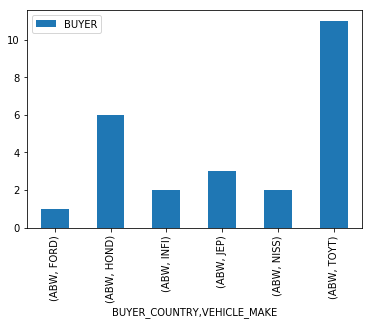

In [31]:
veh_loc[(veh_loc.BUYER_COUNTRY == 'ABW')].groupby(['BUYER_COUNTRY','VEHICLE_MAKE']).count().plot(kind='bar')


In [32]:
veh_loc_agg = veh_loc_final.groupby('BUYER_COUNTRY').BUYER.agg(['count','sum','mean'])
#the below query shows the number of vechicle makes as Count and Sum as Total number of cars by country
veh_loc_agg.head()

,count,sum,mean
BUYER_COUNTRY,,,
ABW,6,25,4.166667
AFG,34,1613,47.441176
ALB,14,42,3.000000
ARE,21,939,44.714286
ARM,21,257,12.238095


In [33]:
veh_loc_agg = veh_loc_agg.sort_values(by = 'mean', ascending = False)
veh_loc_agg.head(10)

,count,sum,mean
BUYER_COUNTRY,,,
USA,72,87455,1214.652778
MEX,41,10016,244.292683
GTM,36,4761,132.250000
CAN,35,2777,79.342857
HND,36,2328,64.666667
GEO,35,2152,61.485714
AFG,34,1613,47.441176
NGA,31,1421,45.838710
GHA,35,1593,45.514286


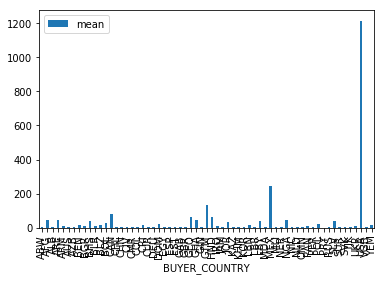

In [34]:
veh_loc_final.groupby('BUYER_COUNTRY').BUYER.agg(['mean']).plot(kind='bar')

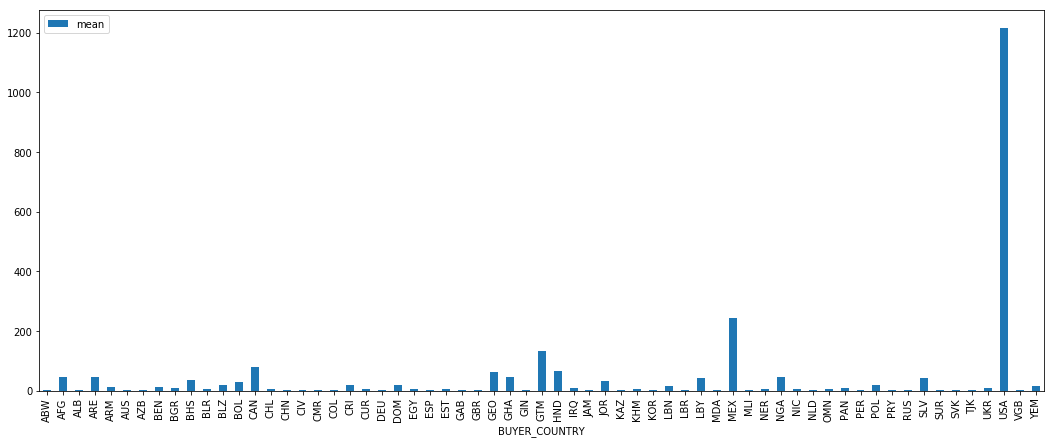

In [35]:
fig, ax = plt.subplots(figsize=(18,7))
veh_loc_final.groupby('BUYER_COUNTRY').BUYER.agg(['mean']).plot(kind='bar', ax = ax)

In [36]:
#Are there any areas where buyers tend to relist vehicles more often (BUYER_RELIST)? If so, where, and in what way?
mrge_all.head(6)

,ID,HIGH_BID,INVOICE_DATE,BUYER_RELISTS,BUYER,BUYER_STATE,BUYER_COUNTRY,BID_GROUP,num_bids,AUCTION_DATE,VEHICLE_YEAR,VEHICLE_MAKE,GROUP_MODEL,VEHICLE_CATEGORY,MODEL_TRIM,YARD_CITY,YARD_STATE
0,10231805,1420,2019-02-05,0,9254,SV,SLV,live,4,2019-02-05,2016,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
1,10231805,1420,2019-02-05,0,9254,SV,SLV,automated,20,2019-02-05,2016,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT
2,17322209,1420,2019-01-31,0,9254,SV,SLV,automated,2,2019-01-30,2015,NISS,VERSA,A,VERSA NOTE,MIAMI,FL
3,26148273,815,2019-01-28,0,9254,SV,SLV,automated,11,2019-01-28,2012,NISS,SENTRA,A,SENTRA 2.0,LEBANON,TN
4,26148273,815,2019-01-28,0,9254,SV,SLV,live,2,2019-01-28,2012,NISS,SENTRA,A,SENTRA 2.0,LEBANON,TN
5,47645751,1575,2019-01-29,0,9254,SV,SLV,automated,3,2019-01-29,2015,NISS,SENTRA,A,SENTRA S,NEW BRITAIN,CT


In [37]:
mrge_all_relist = mrge_all[(['BUYER_RELISTS','BID_GROUP','BUYER_COUNTRY','VEHICLE_YEAR','VEHICLE_MAKE','HIGH_BID'])].loc[mrge_all.BUYER_RELISTS>0].sort_values(by = 'BUYER_RELISTS', ascending = False)
mrge_all_relist.head()

,BUYER_RELISTS,BID_GROUP,BUYER_COUNTRY,VEHICLE_YEAR,VEHICLE_MAKE,HIGH_BID
84803,7,live,USA,2014,DODG,2570
84802,7,automated,USA,2014,DODG,2570
79792,6,live,USA,2018,JEP,32290
79791,6,automated,USA,2018,JEP,32290
11517,5,automated,USA,2013,CHEV,2680


In [38]:
mrge_all_relist[mrge_all_relist['BUYER_COUNTRY']=='USA'].sort_values
  

<bound method DataFrame.sort_values of         BUYER_RELISTS  BID_GROUP BUYER_COUNTRY  VEHICLE_YEAR VEHICLE_MAKE  \
84803               7       live           USA          2014         DODG   
84802               7  automated           USA          2014         DODG   
79792               6       live           USA          2018          JEP   
79791               6  automated           USA          2018          JEP   
11517               5  automated           USA          2013         CHEV   
33890               5       live           USA          2017         LEXS   
33889               5  automated           USA          2017         LEXS   
11518               5       live           USA          2013         CHEV   
42349               5       live           USA          2015         NISS   
42348               5  automated           USA          2015         NISS   
33617               4       live           USA          2016         HYUN   
46701               4  automated     

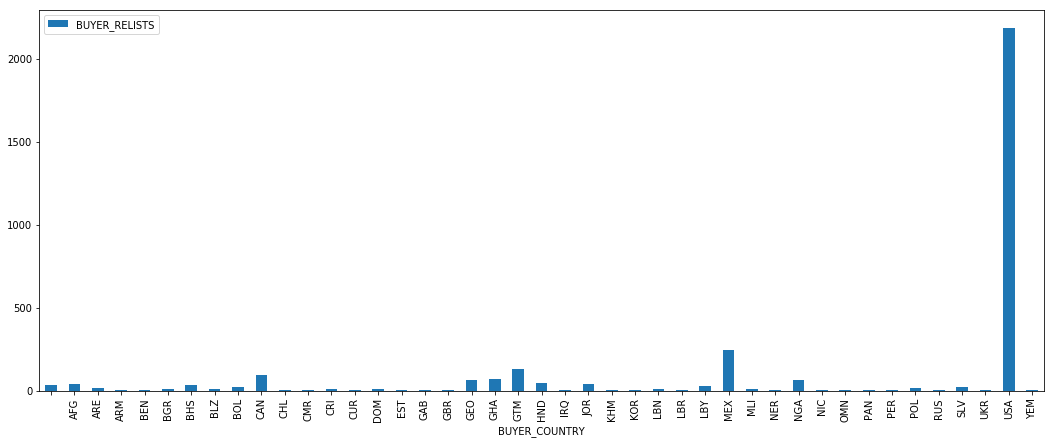

In [39]:
fig, ax = plt.subplots(figsize=(18,7))
mrge_all_relist[(['BUYER_RELISTS','BUYER_COUNTRY'])].groupby(['BUYER_COUNTRY']).count().plot(kind='bar', ax = ax)

In [40]:
#to convert 3 digit country code to Country Name
import pycountry

input_country_code = mrge_all.BUYER_COUNTRY

country_code = {}

for country in pycountry.countries:
    country_code[country.alpha_3] = country.name
    codes = [country_code.get(country, 'Unknown code') for country in input_country_code]
mrge_all['COUNTRY_NAME']=codes
#verifying the result
mrge_all.COUNTRY_NAME.head()

0    El Salvador
1    El Salvador
2    El Salvador
3    El Salvador
4    El Salvador
Name: COUNTRY_NAME, dtype: object

In [41]:
mrge_all.BUYER_COUNTRY[mrge_all['COUNTRY_NAME']=='Unknown code'].unique()

#from the list, '  ' , CUR and AZB are the list of countries that are not in the ISO format

array(['   ', 'CUR', 'AZB'], dtype=object)

In [42]:
#Are there any areas where buyers tend to relist vehicles more often (BUYER_RELIST)? If so, where, and in what way?
mrge_all_relist.head()

,BUYER_RELISTS,BID_GROUP,BUYER_COUNTRY,VEHICLE_YEAR,VEHICLE_MAKE,HIGH_BID
84803,7,live,USA,2014,DODG,2570
84802,7,automated,USA,2014,DODG,2570
79792,6,live,USA,2018,JEP,32290
79791,6,automated,USA,2018,JEP,32290
11517,5,automated,USA,2013,CHEV,2680


In [43]:
#Below code for handling duplicates
mrge_all_relist.shape

(3290, 6)

In [44]:
mrge_all_relist.duplicated().sum()

113

In [45]:
# passing NOT of bool series to see unique values only
bool_series = mrge_all_relist.duplicated(keep = False)
mrge_all_relist = mrge_all_relist[~bool_series]
mrge_all_relist.shape

(3069, 6)

In [46]:
mrge_all_relist[mrge_all_relist['BUYER_RELISTS']>2].groupby(['BUYER_RELISTS','BUYER_COUNTRY','VEHICLE_YEAR']).agg(['count']).sort_values

<bound method DataFrame.sort_values of                                          BID_GROUP VEHICLE_MAKE HIGH_BID
                                             count        count    count
BUYER_RELISTS BUYER_COUNTRY VEHICLE_YEAR                                
3             CAN           2018                 2            2        2
              USA           2012                 2            2        2
                            2013                 7            7        7
                            2014                 2            2        2
                            2015                 4            4        4
                            2016                 4            4        4
                            2018                 6            6        6
4             USA           2015                 1            1        1
                            2016                 2            2        2
5             GHA           2017                 2            2        2
            

In [47]:
mrge_all_relist[mrge_all_relist['BUYER_RELISTS']>2].groupby(['BUYER_RELISTS','BUYER_COUNTRY']).agg(['count']).sort_values

<bound method DataFrame.sort_values of                             BID_GROUP VEHICLE_YEAR VEHICLE_MAKE HIGH_BID
                                count        count        count    count
BUYER_RELISTS BUYER_COUNTRY                                             
3             CAN                   2            2            2        2
              USA                  25           25           25       25
4             USA                   3            3            3        3
5             GHA                   2            2            2        2
              USA                   6            6            6        6
6             USA                   2            2            2        2
7             USA                   2            2            2        2>

In [48]:
#Do buyers approach bidding differently based on vehicle type, or geographic location?
mrge_all.head()
merge_buy_apprch = mrge_all[(['BUYER','num_bids','VEHICLE_MAKE','COUNTRY_NAME'])]
merge_buy_apprch.head()

,BUYER,num_bids,VEHICLE_MAKE,COUNTRY_NAME
0,9254,4,NISS,El Salvador
1,9254,20,NISS,El Salvador
2,9254,2,NISS,El Salvador
3,9254,11,NISS,El Salvador
4,9254,2,NISS,El Salvador


In [49]:
merge_buy_apprch.groupby(['VEHICLE_MAKE','BUYER','COUNTRY_NAME']).agg(['mean'])


num_bids
                                       mean
VEHICLE_MAKE BUYER COUNTRY_NAME            
ACUR         1537  United States  31.000000
             1622  United States  15.500000
             2280  United States  49.500000
             2298  United States  27.500000
             2309  United States   9.500000
             2312  United States  29.166667
             2316  United States  26.500000
             2333  Guatemala      29.500000
             2351  Guatemala      35.500000
             2356  United States   8.000000
             2357  United States  28.500000
             2362  United States  20.000000
             2367  United States   5.000000
             2404  Mexico         16.000000
             2505  United States  15.500000
             2537  Canada         11.000000
             2586  United States  20.000000
             2686  Nigeria        15.000000
             2696  Mexico         19.500000
             2733  United States  36.666667
             2744  United States  15.500000
             2812  United States  10.500000
             2878  Bahamas         8.000000
             2887  Mexico         13.750000
             2905  Guatemala      39.500000
             2938  United States  37.500000
             2951  United States  26.000000
             2985  United States  16.000000
             2987  United States  33.000000
             3006  Ghana          13.333333
...                                     ...
VOLV         9845  United States  26.333333
             9894  United States  16.000000
             9977  United States   9.750000
             10090 United States   8.666667
             10109 Poland         25.666667
             10132 Unknown code   58.000000
             10187 United States  13.750000
             10220 United States  21.000000
             10230 Guatemala      18.000000
             10253 United States  31.500000
             10278 United States  20.000000
             10365 United States  44.000000
             10399 United States  19.000000
             10487 United States  12.000000
             10500 Unknown code   14.500000
             10523 United States  11.000000
             10647 United States   8.000000
             10703 Mexico         24.000000
             10851 United States  31.000000
             10931 United States  34.500000
             11100 United States   7.000000
             11105 Mexico         25.500000
WILD         10814 United States  24.000000
WINN         3243  United States  22.000000
YAMA         3082  Mexico         23.000000
             4099  United States  19.500000
             4469  Mexico         21.500000
             5416  Afghanistan    14.000000
             6019  United States  15.000000
             9609  United States  14.000000

[32049 rows x 1 columns]

In [52]:
mrge_all_relist.head()
#rows to collumns

pd.melt(mrge_all_relist)


,variable,value
0,BUYER_RELISTS,7
1,BUYER_RELISTS,7
2,BUYER_RELISTS,6
3,BUYER_RELISTS,6
4,BUYER_RELISTS,5
5,BUYER_RELISTS,5
6,BUYER_RELISTS,5
7,BUYER_RELISTS,5
8,BUYER_RELISTS,5
9,BUYER_RELISTS,5
